# <font color="red"> Previsão de Vendas das Farmácias da Rossmann </font>

## <font color="blue"> Agenda </font>

- Contexto
- Desafio
- Desenvolvimento da Solução
- Conclusão & Demonstração
- Próximos Passos

## <font color="blue"> 1. Contexto </font>

O desafio surgiu em uma reunião de apresentação de resultados mensais entre o CFO e os gerentes das lojas da Rossmann, onde foi requisitado aos gerentes a previsão de vendas de cada loja para as próximas 06 semanas.

## <font color="blue"> 2. Desafio </font>

Após falar com o CFO, o mesmo disse que quer essa previsão de vendas para destinar recursos para reforma das lojas.

A forma de previsão de vendas atual apresenta grande divergência com a realidade, é baseada em experiências passadas e feita de forma completamente manual. 

Assim, optei pela utilização de Machine Learning para realizar a previsão de vendas para todas as lojas, com a possibilidade de visualizar as previsões pelo celular ou outro aparelho com acesso ao Telegram

## <font color="blue"> 3. Desenvolvimento da Solução </font>

### Dimensões do Conjunto de Dados

In [13]:
print(f'Número de atributos/colunas: {df1.shape[1]}')
print(f'Número de registros/linhas:  {df1.shape[0]}')

Número de atributos/colunas: 18
Número de registros/linhas:  1017209


### Análise Estatística Descritiva

In [36]:
df_desc = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T.reset_index()
df_desc.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
df_desc

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
1,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
2,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
3,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
4,competition_open_since_month,1.00,12.00,11.00,6.79,7.00,3.31,-0.04,-1.23
5,competition_open_since_year,1900.00,2015.00,115.00,2010.32,2012.00,5.52,-7.24,124.07
6,promo2_since_week,1.00,52.00,51.00,23.62,22.00,14.31,0.18,-1.18
7,promo2_since_year,2009.00,2015.00,6.00,2012.79,2013.00,1.66,-0.78,-0.21


### *Mindmap* de Hipóteses

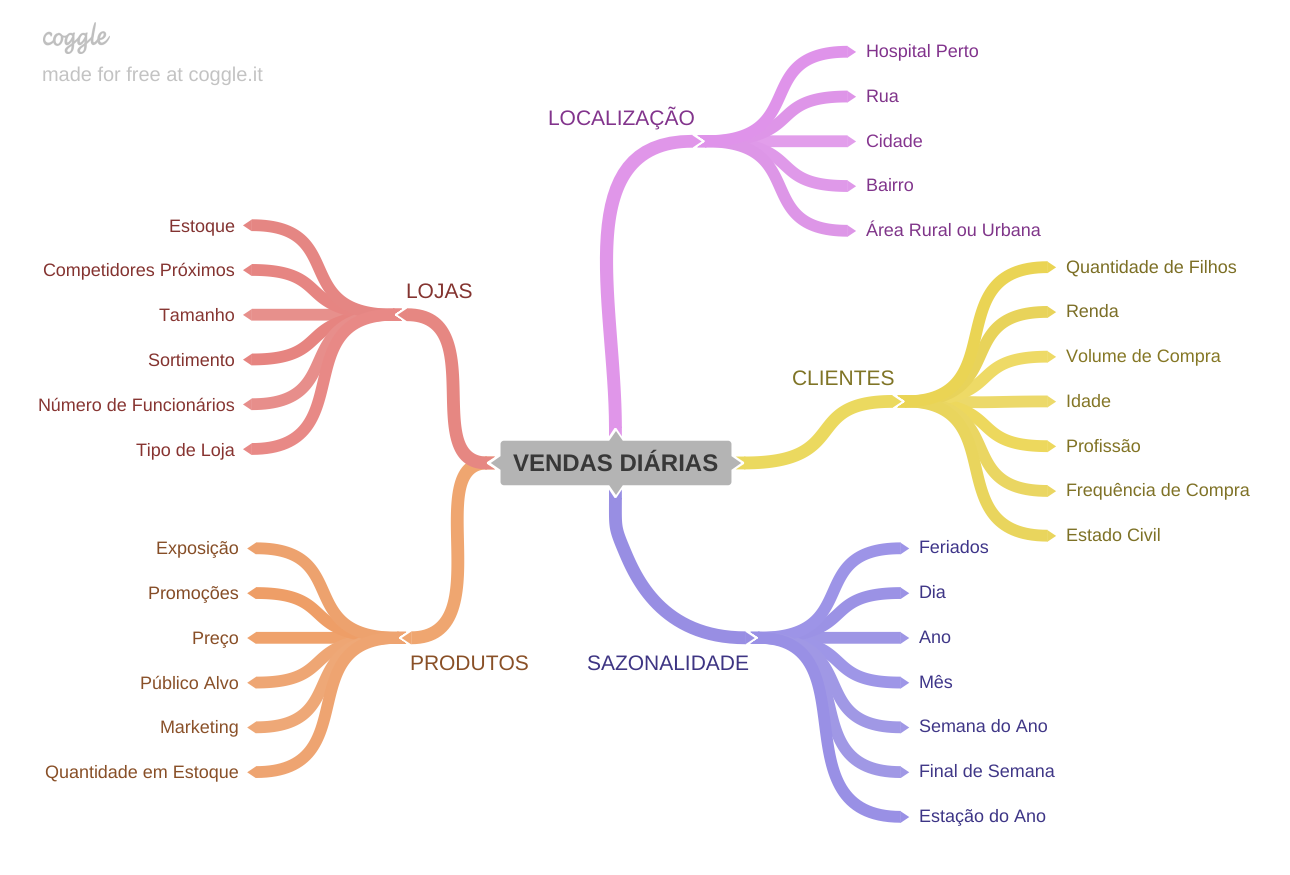

In [37]:
Image('images/mindmap_rossmann.png')

### Lista de Hipóteses

- Lojas:
    - Lojas com maior sortimento (mix de produtos) vendem mais;
    - Lojas com competidores muito próximos vendem menos;
    - Lojas com competidores a mais tempo vendem menos;
- Produtos:
    - Lojas com promoções ativas por mais tempo vendem mais;
    - Lojas com mais promoções consecutivas vendem mais;
- Sazonalidade:
    - Lojas abertas durante o feriado de Natal vendem mais;
    - Lojas vendem cada vez mais ao longo dos anos;
    - Lojas vendem mais no segundo semestre do ano;
    - Lojas vendem mais depois do dia 10 de cada mês;
    - Lojas vendem menos no final de semana;
    - Lojas vendem menos durante feriados escolares;

### Análise Exploratória de Dados

#### Variável Resposta

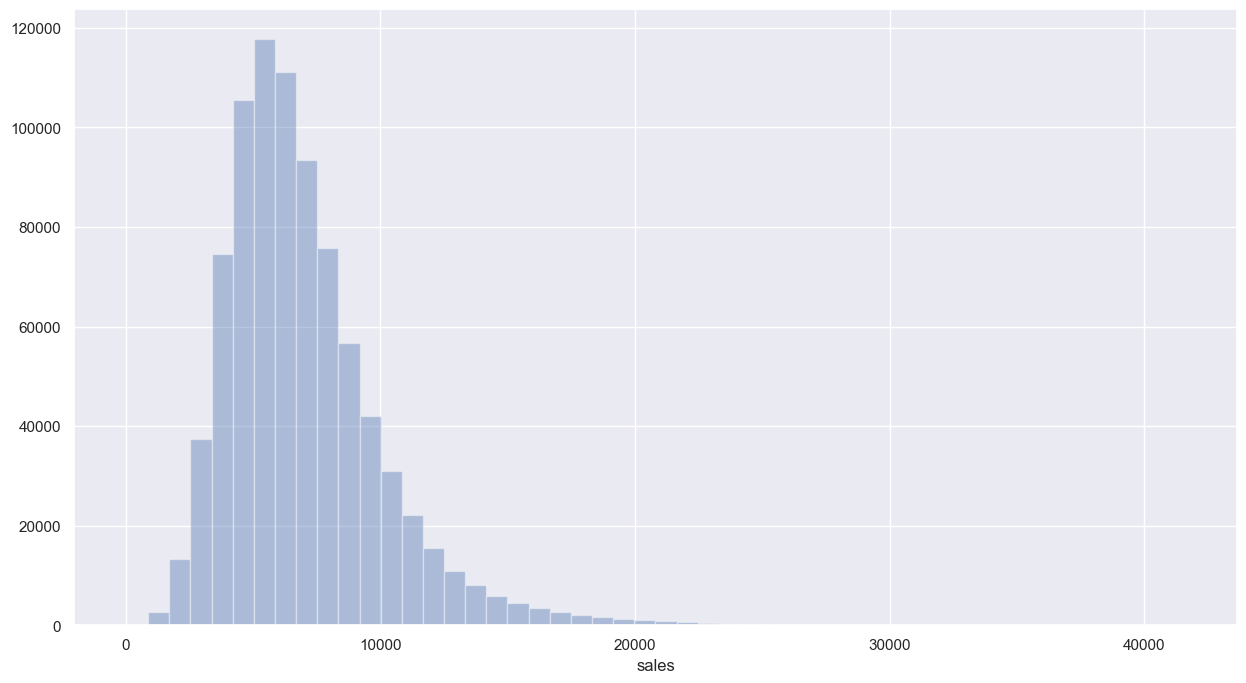

In [57]:
sns.distplot(df4['sales'], kde=False);

#### Variáveis Numéricas

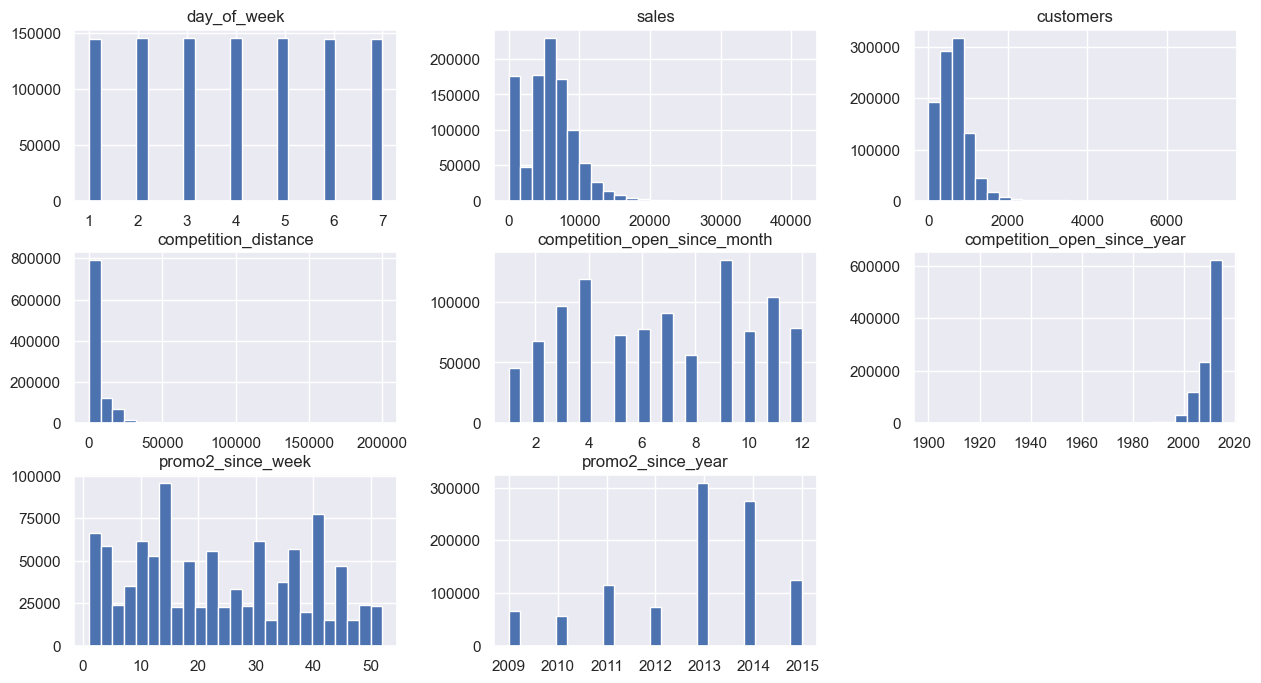

In [58]:
df_numerical.hist(bins = 25);

#### Variáveis Categóricas

##### state_holiday

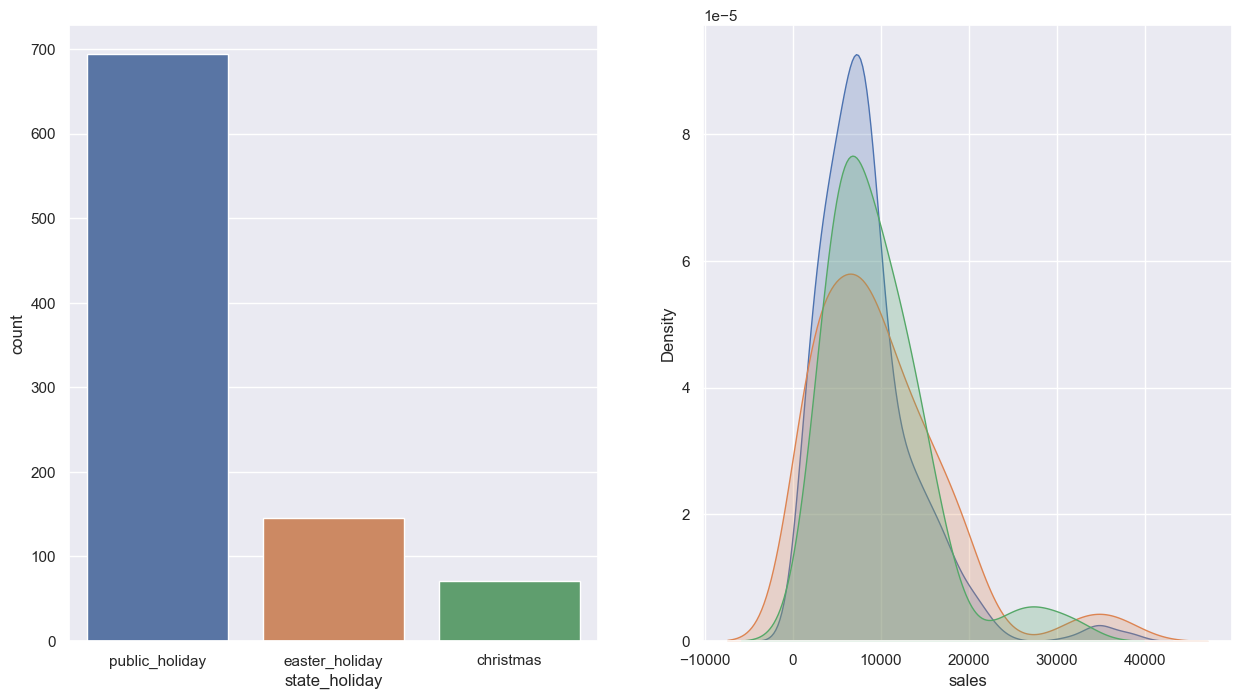

In [63]:
plt.subplot(1, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x=a['state_holiday'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True);

##### store_type

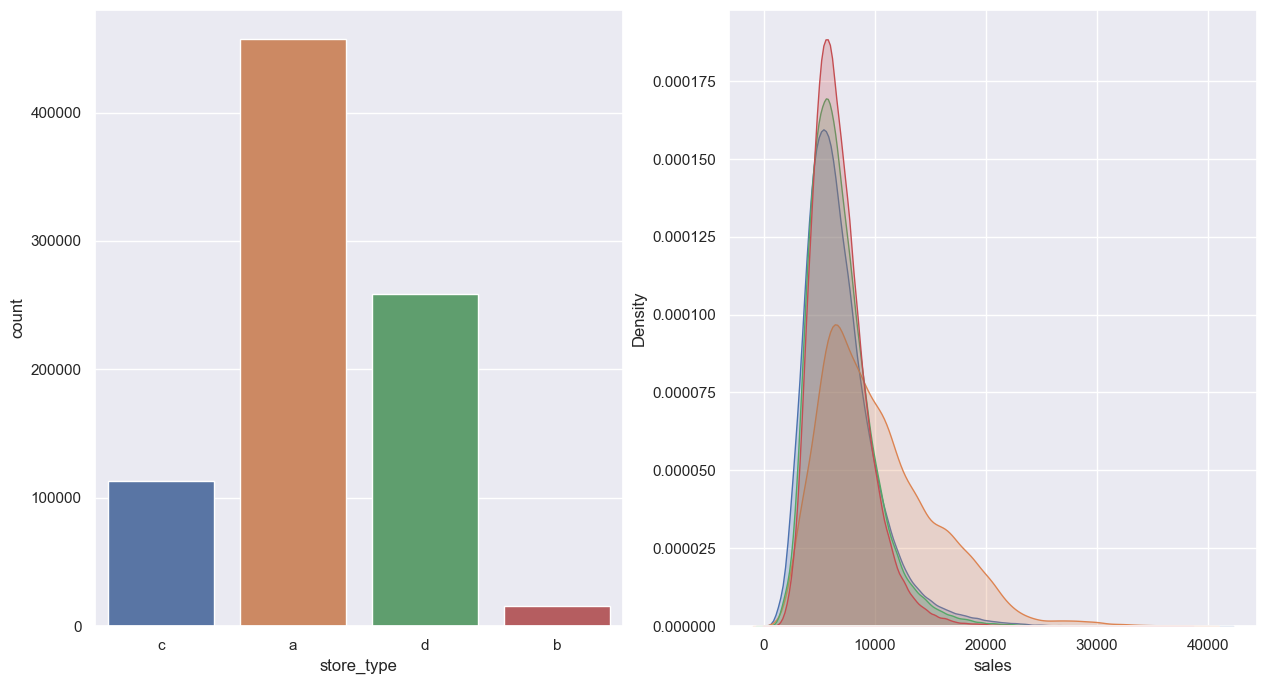

In [64]:
plt.subplot(1, 2, 1)
sns.countplot(x=df4['store_type'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True);

##### assortment

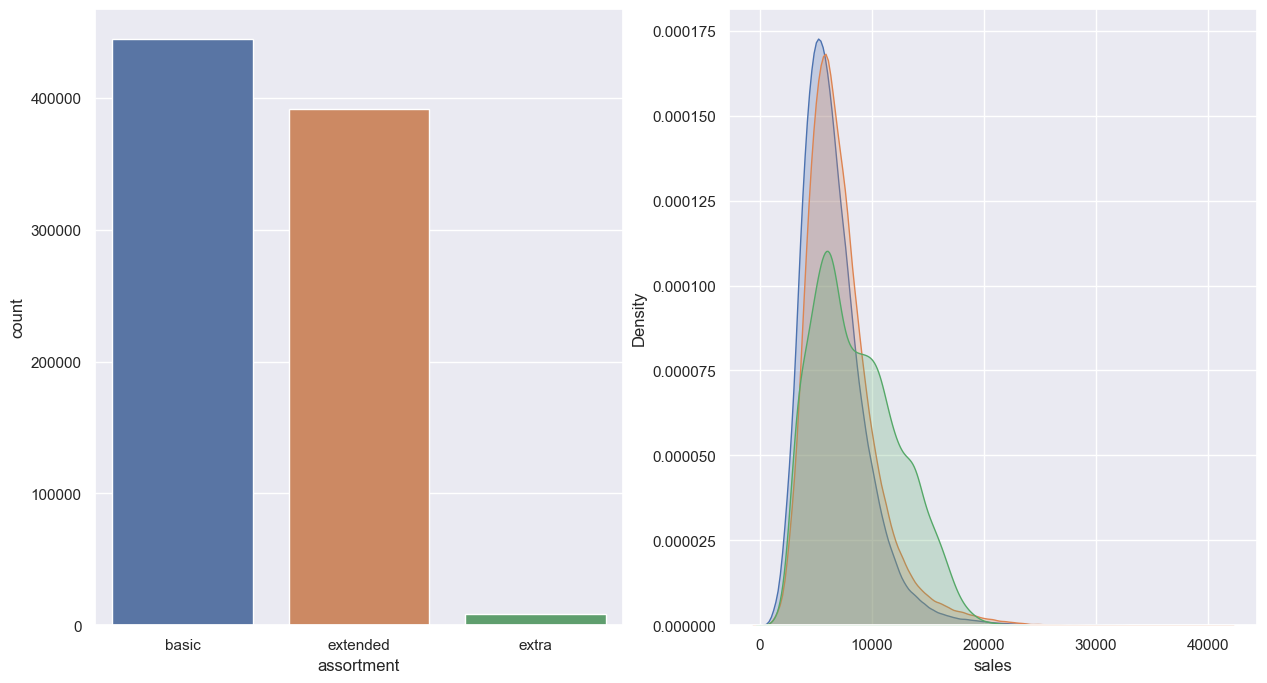

In [65]:
plt.subplot(1, 2, 1)
sns.countplot(x=df4['assortment'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True);

### Validação de Hipóteses

|    Número      | Hipótese   | Conclusão |
| :------------: | :------:   | :-------: |
|       H1       | Lojas com maior sortimento (mix de produtos), na média, vendem mais | FALSA |
|       H2       | Lojas com competidores muito próximos vendem menos                  | FALSA |
|       H3       | Lojas com competidores a mais tempo vendem menos                    | VERDADEIRA |
|       H4       | Lojas com promoções ativas por mais tempo vendem mais               | FALSA |
|       H5       | Lojas com mais promoções consecutivas vendem mais                   | FALSA |
|       H6       | Lojas abertas durante o feriado de Natal vendem mais                | FALSA |
|       H7       | Lojas vendem mais no segundo semestre do ano                        | FALSA |
|       H8       | Lojas vendem mais depois do dia 10 de cada mês                      | VERDADEIRA |
|       H9       | Lojas vendem menos durante feriados escolares                       | VERDADEIRA |

### Correlação entre Variáveis

#### Variáveis Numéricas

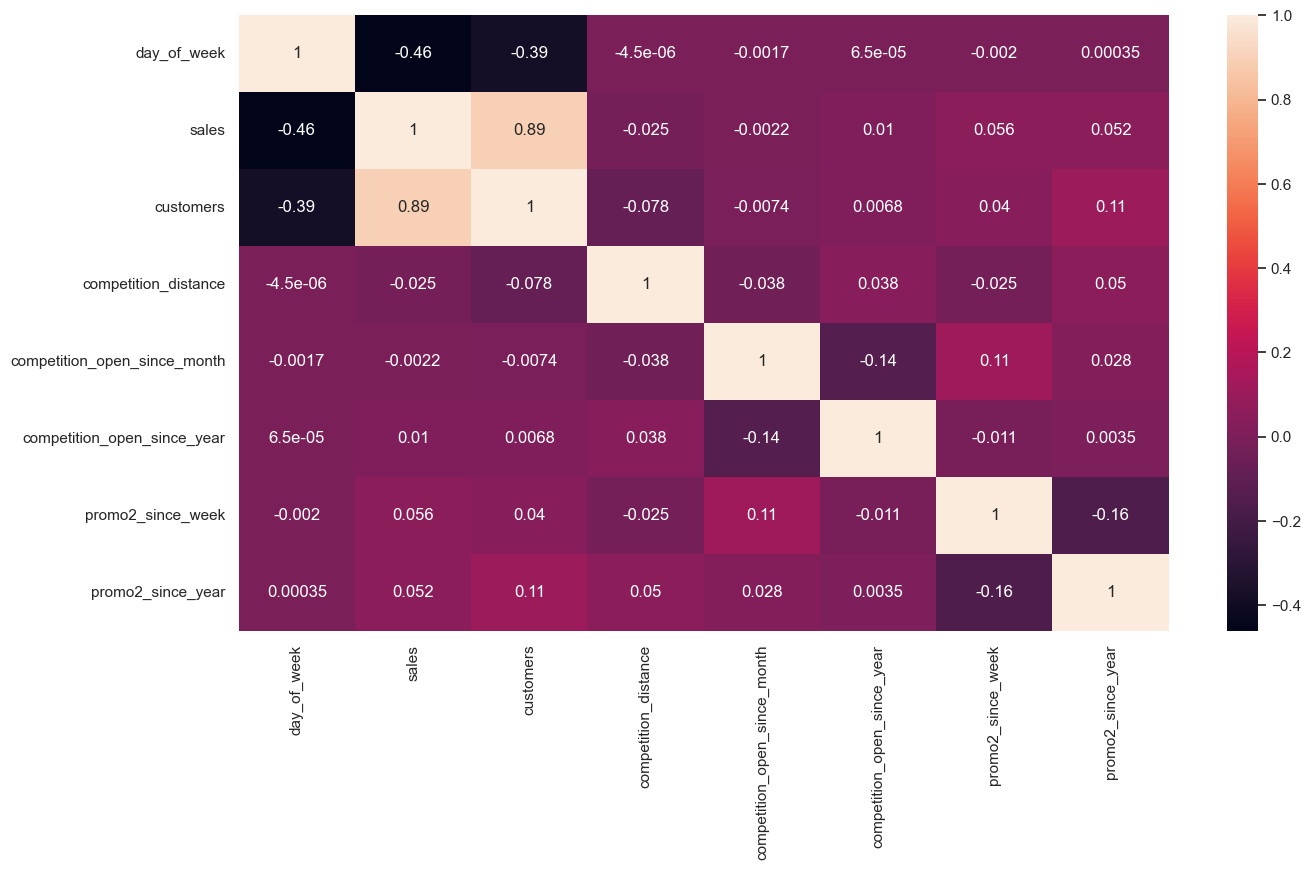

In [105]:
correlation = df_numerical.corr(method='pearson')
sns.heatmap(correlation, annot=True);

#### Variáveis Categóricas

<AxesSubplot:>

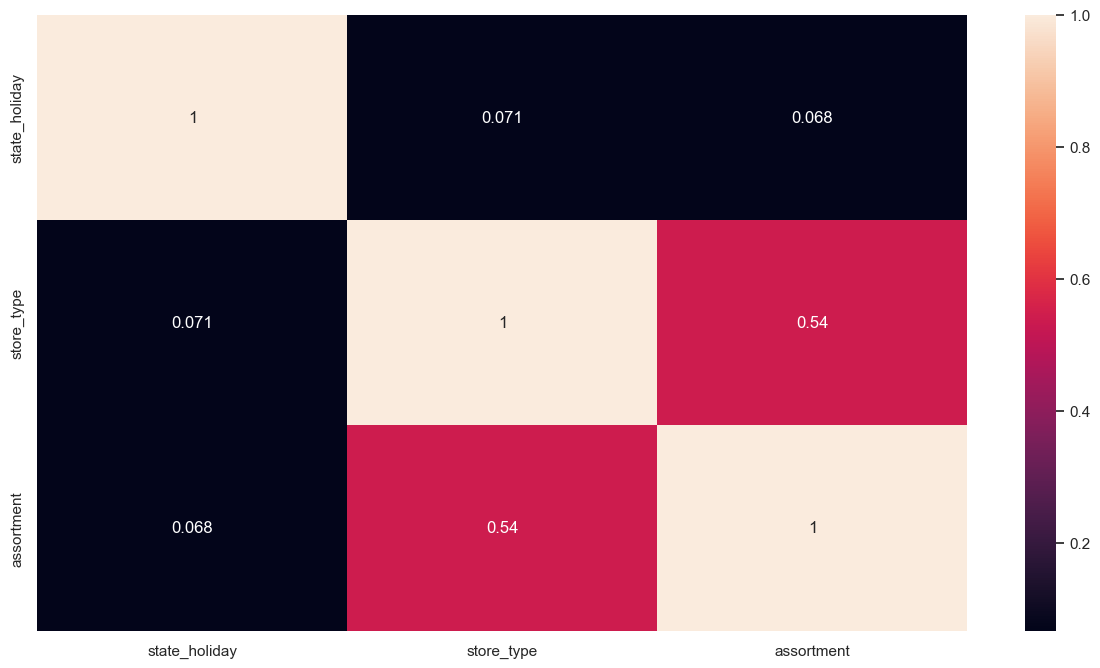

In [108]:
sns.heatmap(df_corr, annot=True)

### Modelos de Machine Learning

Para fazer a previsão de vendas, utilizei 05 algoritmos de Machine Learning:
- *Average Model*
- *Linear Regression*
- *Linear Regression Regularized*
- *Random Forest Regressor*
- *XGBoost Regressor*

### Comparando a Performance dos Modelos

In [108]:
models_result = pd.concat([baseline_result, lr_result, lrr_result, rf_result, xgb_result])
models_result.sort_values('RMSE')

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,680.01,0.10,1011.71
0,XGBoost Regressor,889.33,0.13,1312.66
0,Average Model,1354.80,0.46,1835.14
0,Linear Regression,1867.09,0.29,2671.05
0,Linear Regression Regularized,1891.70,0.29,2744.45


### Performance após Cross-Validation

In [115]:
cv_models_result = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
cv_models_result

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Linear Regression Regularized,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressor,837.61 +/- 218.04,0.12 +/- 0.02,1256.51 +/- 319.05
0,XGBoost Regressor,1043.84 +/- 163.21,0.14 +/- 0.01,1506.73 +/- 221.11


### Performance do Modelo Final

In [152]:
xgb_result_tuned = ml_error('XGBoost Regressor', np.expm1(Y_test), np.expm1(yhat_xgb_tuned))
xgb_result_tuned

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,881.45,0.13,1283.47


## <font color="blue"> 4. Conclusão & Demonstração </font>

### Performance sobre o Negócio

In [158]:
df_final['worst_scenario'] = df_final['predictions'] - df_final['MAE']
df_final['best_scenario']  = df_final['predictions'] + df_final['MAE']
df_final = df_final[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]
df_final.head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
0,1,174484.73,174086.86,174882.61,397.87,0.09
1,2,185132.41,184629.27,185635.54,503.14,0.10
2,3,255490.67,254952.16,256029.19,538.52,0.07
3,4,329700.75,328569.71,330831.79,1131.04,0.11
4,5,173620.06,173204.65,174035.47,415.41,0.10


### Dispersão do Erro por Loja

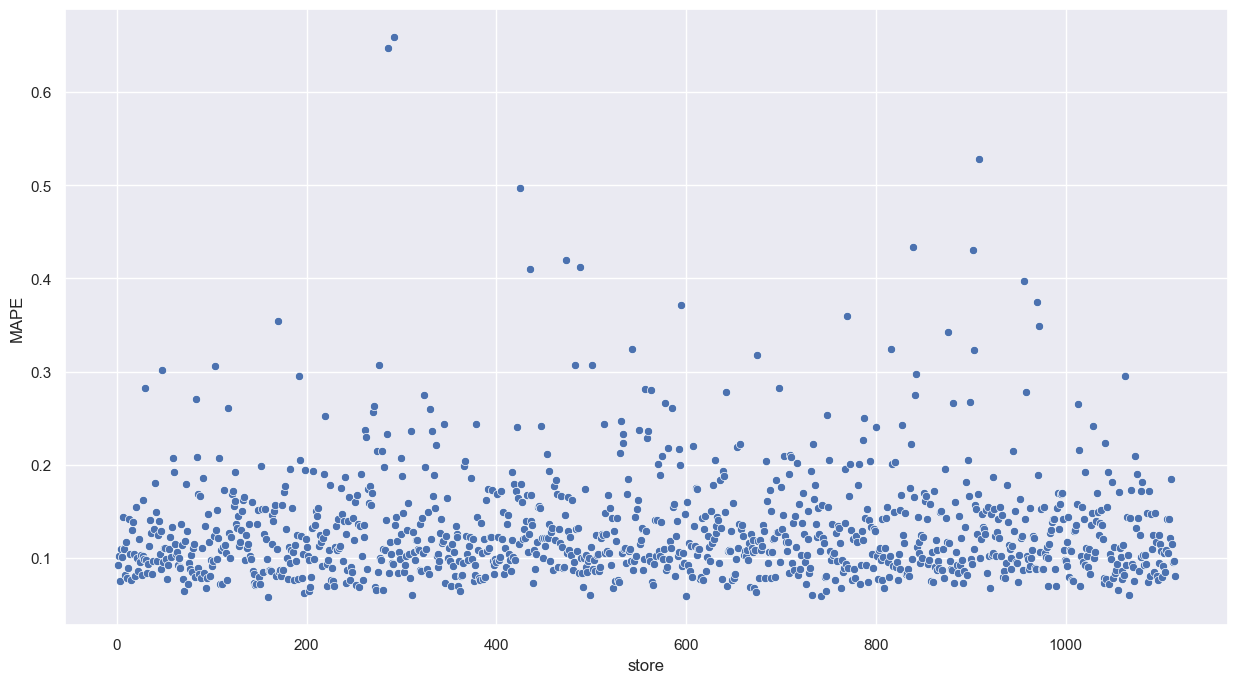

In [159]:
sns.scatterplot(x='store', y='MAPE', data=df_final);

### Performance Financeira Total

In [160]:
df_total = df_final[['predictions', 'worst_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis = 0).reset_index().rename(columns={'index': 'Scenarios', 0:'Sales'})
df_total

,Scenarios,Sales
0,predictions,281083520.00
1,worst_scenario,280098063.27
2,best_scenario,282068968.59


### Performance do Modelo

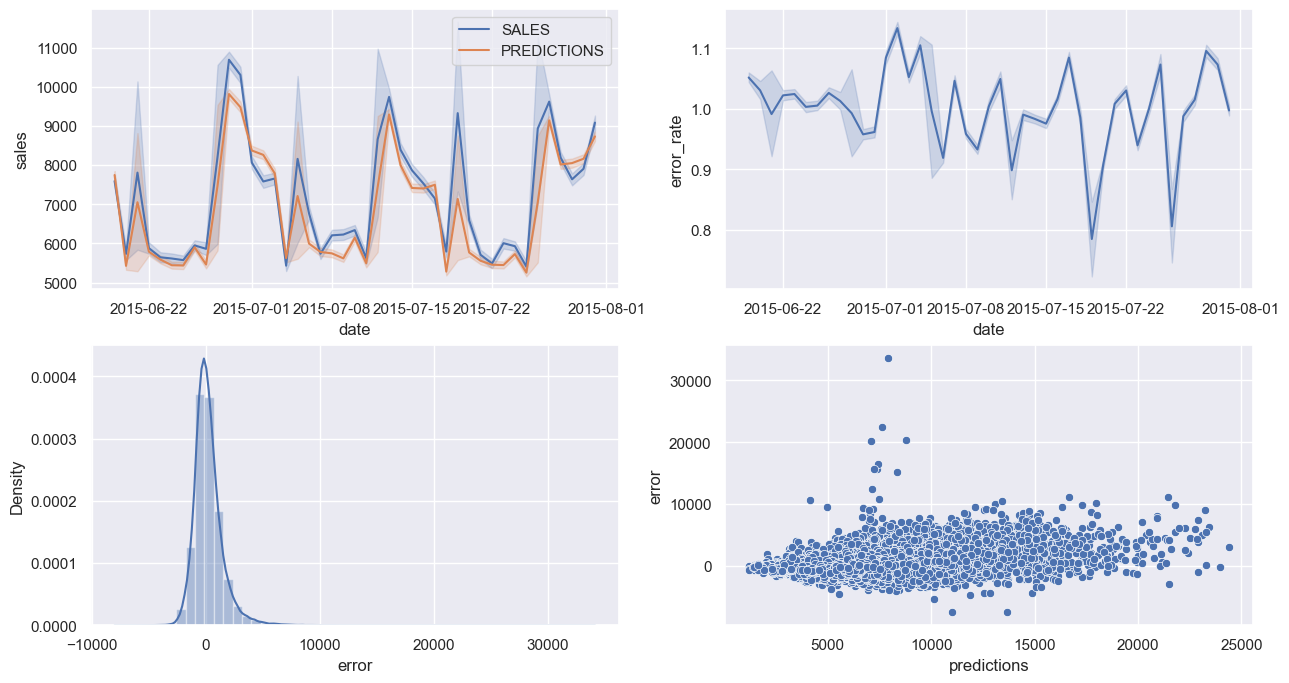

In [162]:
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='sales', data=df9, label='SALES')
sns.lineplot(x='date', y='predictions', data=df9, label='PREDICTIONS')

plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='error_rate', data=df9)

plt.subplot(2, 2, 3)
sns.distplot(df9['error'])

plt.subplot(2, 2, 4)
sns.scatterplot(x='predictions', y='error', data=df9);

### Bot no Telegram

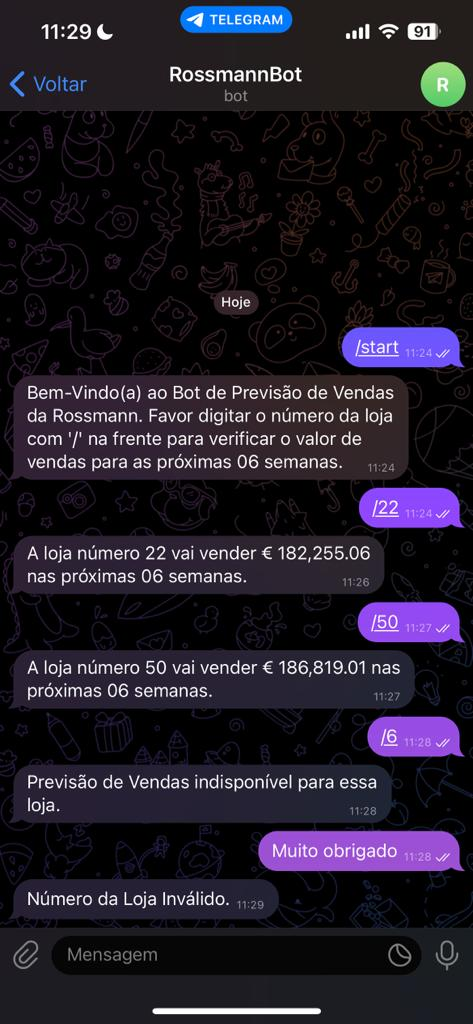

In [6]:
from IPython.display import Image
Image('C:/Users/Nicolas/repos/comunidade_DS/ds_em_producao_v2/images/bot.jpeg')

## <font color="blue"> 5. Próximos Passos </font>

- Coletar mais dados e adotar novas premissas de negócio;
- Realizar o preenchimento de valores faltantes de outra forma;
- Testar outros algoritmos de Machine Learning;
- Utilizar outra estratégia para o Hyperparemeter Fine Tunning (ex.: Bayesian Search); e
- Melhorar o funcionamento do Bot no Telegram.

## <font color="blue"> Muito Obrigado! </font>